### Solución de la ecuación de onda para una cuerda fija en los extremos

In [39]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

plt.style.use('bmh')

La ecuación diferencial parcial para una onda unidimensional
$$
\frac{\partial^2 u}{\partial x^2}(x,t) = \frac{1}{v^2} \frac{\partial^2 u}{\partial t^2}(x,t)
$$
bajo las condiciones de borde
$$
\begin{aligned}
u(0,t) &= u(L,t) = 0, \quad t \geq 0, \\
u(x,0) &= \left\{ \begin{array}{cc}
    \frac{2Ax}{L},  & \text{si} \ 0 \leq x \leq L/2,  \\
    \frac{2A(L-x)}{L}, & \text{si} \ L/2 \leq x \leq L 
\end{array}\right., \\
\frac{\partial u}{\partial t}(x,0) &= 0, \qquad 0 \leq x \leq L,
\end{aligned}
$$
tiene como solución
$$
u(x,t) = \sum_{k = 1}^{\infty} \frac{8A (-1)^{k+1}}{(2k-1)^2 \pi^2} \sin\left(\frac{(2k-1)\pi}{L} x \right) \cos\left(\frac{(2k-1)\pi v}{L} t \right), \quad 0 \leq x \leq L,\quad  t \geq 0.
$$

Introduciendo las variables adimensionales $\tilde{u}(x,t) := u(x,t)/A$, $\tilde{x} := x/L$ y $\tilde{t} := vt/L$, obtenemos que
$$
\tilde{u}(x,t) = \sum_{k = 1}^{\infty} \frac{8(-1)^{k+1}}{(2k-1)^2 \pi^2} \sin\left[(2k-1)\pi \tilde{x} \right] \cos\left[(2k-1)\pi \tilde{t} \right], \quad 0 \leq \tilde{x} \leq 1, \quad  \tilde{t} \geq 0.
$$


In [40]:
#Definición de la función de onda:
def u(x,t,n):
    sum = 0.0

    for k in range(1,n+1):
        sum += ((8*(-1)**(k+1))/((2*k-1)**2*np.pi**2))*np.sin((2*k-1)*np.pi*x)*np.cos((2*k-1)*np.pi*t)
        
    return sum

In [41]:
#Valores de x y t (adimensionales) a usar:
x = np.linspace(0,1,10**4) 
t = np.linspace(0,5,10**2)

In [42]:
#Animación:
import matplotlib.animation as animation

In [43]:
#Función que actualiza los frames:
def update(i,x,t):
    ax.clear()     #Clear axis

    plt.plot(x,u(x,t[i],50), linewidth = 1.5, color = 'red')    #Gráfica de la Cuerda

    plt.grid(True)
    plt.xticks([0,1],['$0$','$L$'],fontsize = 15)
    plt.yticks([-1,0,1],['$-A$',0,'$A$'],fontsize = 15)
    plt.ylim(-1.1,1.1)
    plt.xlabel('$x$',fontsize = 16)
    plt.ylabel('$u(x,t)$',fontsize = 16)

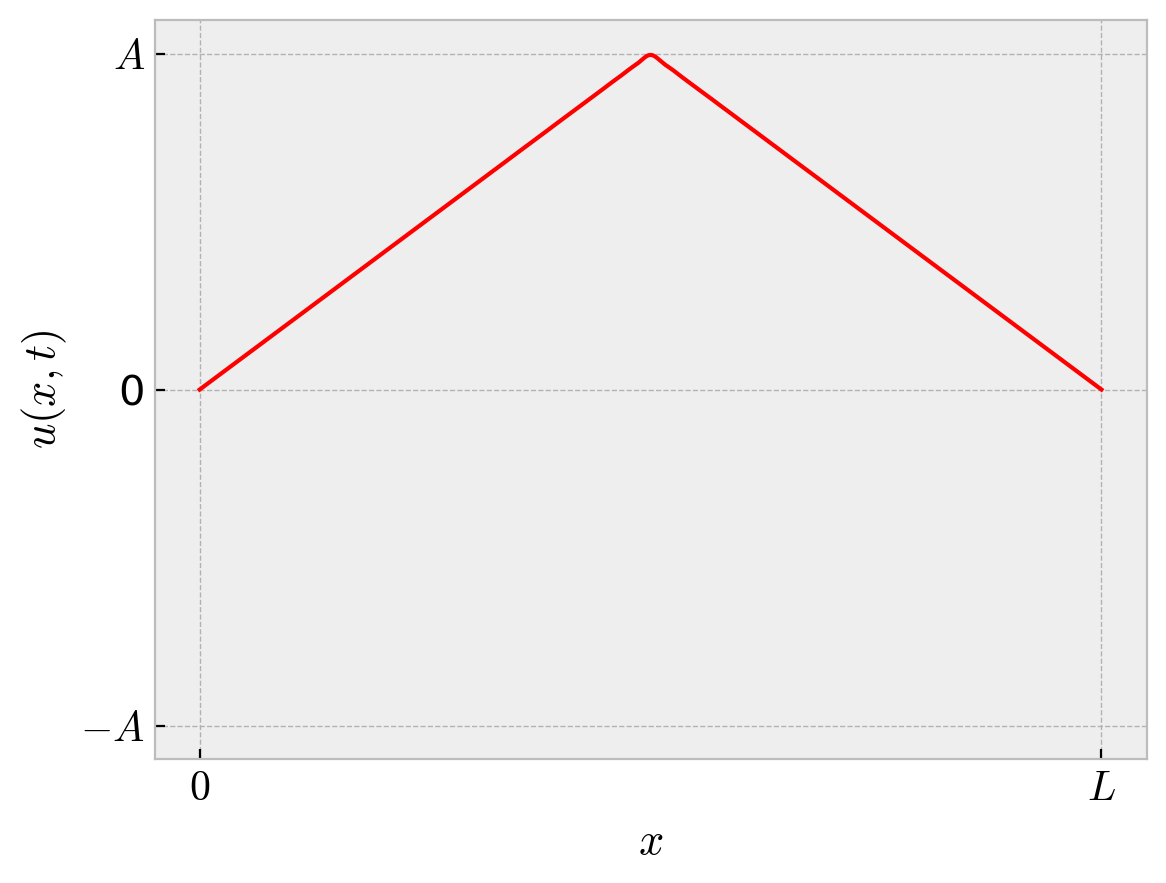

In [44]:
#Creación de la figura y ejes que contienen la animación:
fig, ax = plt.subplots(dpi=200)

anim = animation.FuncAnimation(fig, func = update, fargs = (x,t,), frames = len(t), interval = 1)
anim.save('String-Motion.gif')